# (Flight Performance)
## by (Mohamed Abdrabbou)

## Preliminary Wrangling

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays,
from 1987 to 2008. I downloaded it from bureau of Transportation Statistics website. I will be investigating the last 3 years 2006, 2007 and 2008



In [1]:
# import all required packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# create 3 seperate dataframes, one for each year and then collect them together

df_total=pd.read_csv('2008.csv')

#df_8=pd.read_csv('2008.csv')
#df_7=pd.read_csv('2007.csv')
#df_6=pd.read_csv('2006.csv')
#df_total = df_6.append([df_7,df_8])


In [3]:
# display the first 10 rows
df_total.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
#  inverstigation of the dataset structure
print(df_total.shape)
print(df_total.dtypes)

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


In [5]:
# Summary statistics
df_total.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


### What is the structure of your dataset?

>The data has 29 columns representing different parameters.

### What is/are the main feature(s) of interest in your dataset?

> I am trying to figure out the factors causing either flight delays or cancellation.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I am interested in every features that can have a contribution to delays in both arrival and departure.

## Univariate Exploration



I am going to investigate both flight delays(Departure and Arrival) distributions and cancellation causes and distribution in months.


## Common reasons for cancellation

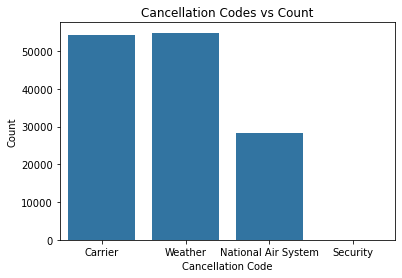

In [6]:
g_color = sb.color_palette()[0]

graph = sb.countplot(data = df_total, x = 'CancellationCode', color = g_color, order = ['A','B','C','D'])
plt.title('Cancellation Codes vs Count')
plt.xlabel('Cancellation Code')
plt.ylabel('Count')
graph.set_xticklabels(['Carrier','Weather','National Air System','Security']);


We can observe from above that Carrier  and Weather are the most significant causes of flight cancellations.

## Months with highest cancellation events

In [7]:
#extracting subset with only cancellation data
df_Cancel=df_total.query('CancellationCode in ["A","B","C","D"]')

Text(0, 0.5, 'Count')

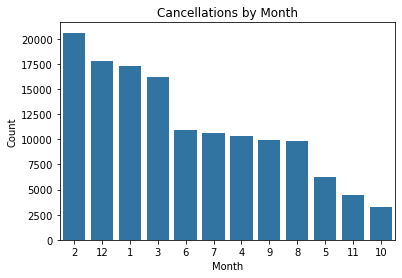

In [8]:
Month_order = df_Cancel.Month.value_counts()
sb.countplot(data = df_Cancel, x='Month', color = g_color, order = Month_order.index)
plt.title('Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Count')

The top three months resides primarily in winter which poses an interesting question about weather effect.

### Distribution of Arrival Delays

In [9]:
#Extracting data with Arrival Delay information, leaving out NaN values
df_Arr_Delay = df_total[df_total.ArrDelay.notnull()]

Text(0, 0.5, 'Count')

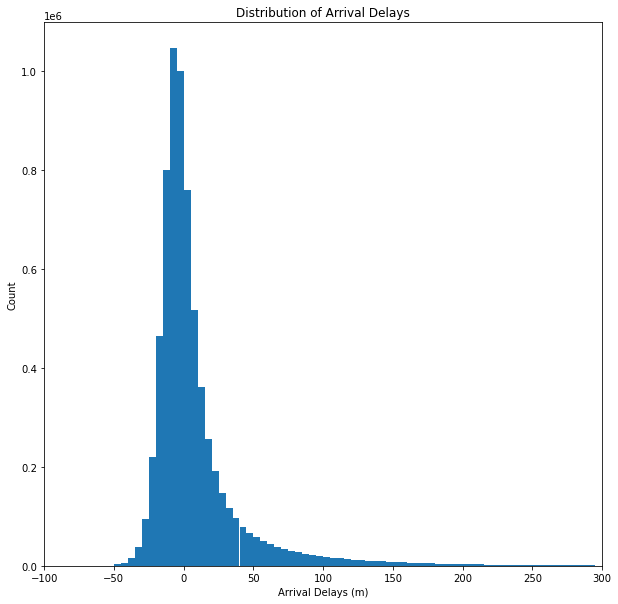

In [10]:
#construct plot
plt.figure(figsize = (10,10))
bin_edges = np.arange(-50,300,5)
plt.hist(df_Arr_Delay.ArrDelay, bins = bin_edges)
plt.xlim(-100,300)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delays (m)')
plt.ylabel('Count')


As we can Observe the arrival delays distribution is right skewed.

### Distribution of Departure delays

In [11]:
#Extracting data with Departure Delay information, leaving out NaN values
df_Dep_Delay = df_total[df_total.DepDelay.notnull()]

Text(0, 0.5, 'Count')

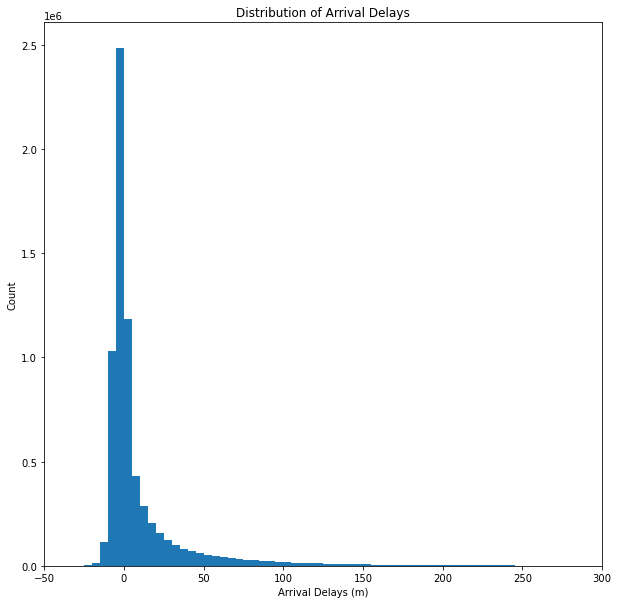

In [13]:
#construct plot
plt.figure(figsize = (10,10))
bin_edges = np.arange(-50,300,5)
plt.hist(df_Dep_Delay.DepDelay, bins = bin_edges)
plt.xlim(-50,300)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delays (m)')
plt.ylabel('Count')

As we can Observe the deparutre delays distribution is also right skewed.

## Bivariate Exploration



### Relationship between departure and arrival delays

Text(0, 0.5, 'Arrival Delay (m)')

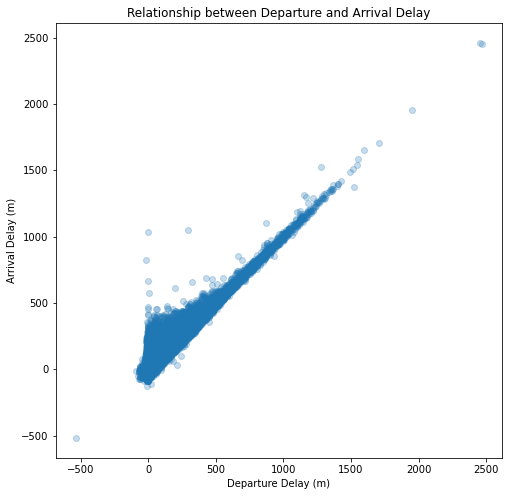

In [14]:
# Construct the plot
plt.figure(figsize = (8,8))
plt.scatter(data=df_total.query('Cancelled==0'),x='DepDelay',y='ArrDelay', alpha=1/4)
plt.title('Relationship between Departure and Arrival Delay')
plt.xlabel('Departure Delay (m)')
plt.ylabel('Arrival Delay (m)')

A linear relationship can be observed that is consistent with the weather observation since they are affected by the same factor.

### Relation between cancelation code and month

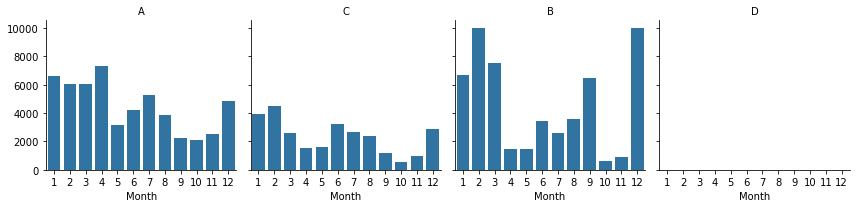

In [15]:
#construct plot
month_index = [1,2,3,4,5,6,7,8,9,10,11,12]
g = sb.FacetGrid(data = df_Cancel, col='CancellationCode')
g.map(sb.countplot,'Month',order = month_index)
g.set_titles("{col_name}");

This figure maximizes the doubt about weather effect on cancelation actions and this can be observed clearly in B.

## Multivariate Exploration


### Delay behavior through different months, considering different types of delays and weights of variations 

In [19]:
#Generating df for each cancelation reason bymonth and determine the mean for each 
Carrier_month=df_total.query('CarrierDelay>0').groupby('Month')['CarrierDelay'].mean().reset_index(name='CarrierDelay')
Weather_month=df_total.query('WeatherDelay>0').groupby('Month')['WeatherDelay'].mean().reset_index(name='WeatherDelay')
Nas_month=df_total.query('NASDelay > 0').groupby('Month')['NASDelay'].mean().reset_index(name='NASDelay')
Security_month=df_total.query('SecurityDelay > 0').groupby('Month')['SecurityDelay'].mean().reset_index(name='SecurityDelay')
Aircraft_month=df_total.query('LateAircraftDelay > 0').groupby('Month')['LateAircraftDelay'].mean().reset_index(name='LateAircraftDelay')

In [20]:
#Bring all of them in one df

Delays_month = Carrier_month.merge(Weather_month,on='Month')
Delays_month = Delays_month.merge(Nas_month,on='Month')
Delays_month = Delays_month.merge(Security_month,on='Month')
Delays_month = Delays_month.merge(Aircraft_month,on='Month')

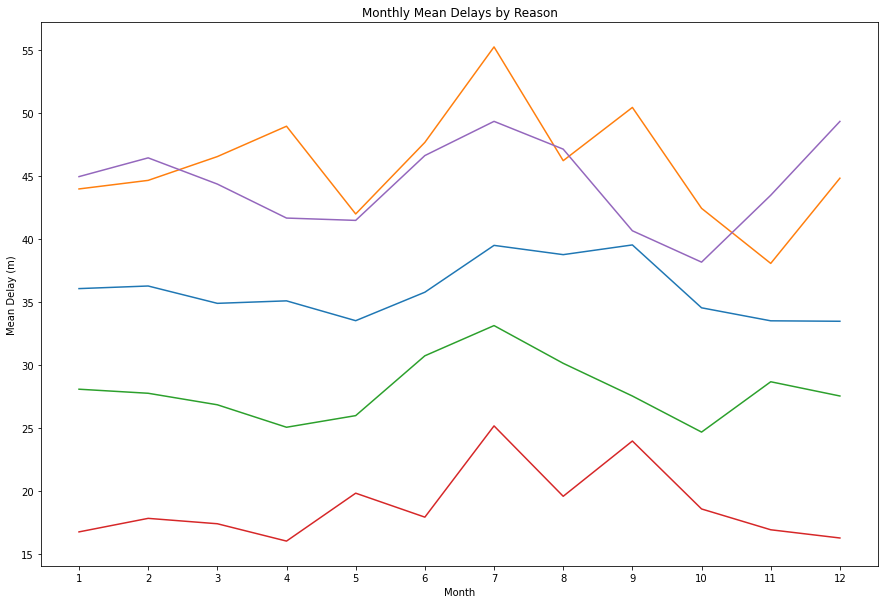

In [28]:
#construct the  line plot with defining error bars to display the variations 

plt.figure(figsize = (15,10))
plt.errorbar(x = Delays_month.Month, y = Delays_month.CarrierDelay)
plt.errorbar(x = Delays_month.Month, y = Delays_month.WeatherDelay)
plt.errorbar(x = Delays_month.Month, y = Delays_month.NASDelay)
plt.errorbar(x = Delays_month.Month, y = Delays_month.SecurityDelay)
plt.errorbar(x = Delays_month.Month, y = Delays_month.LateAircraftDelay)


plt.title('Monthly Mean Delays by Reason')
plt.xlabel('Month')
plt.ylabel('Mean Delay (m)')

plt.xticks(Delays_month.Month);

As shown above, it is confirmed again that weather contributes to delays along with the aircraft delays. And counterintuitively delays for security reason is the lowest causing factor. So overall, the different layers of analysis support that weather conditions is the main player in delays and cancellations for flights.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!